In [1]:
import seawater as sw


L = 33.2, 2.5
G = 35.0, 12.5
M = (L[0] + G[0]) * 0.5, (L[1] + G[1]) * 0.5
line = sw.dens0(M[0], M[1]) - 1000

In [2]:
import numpy as np


t = np.arange(0, 15 + 1, 1)
s = np.arange(32.5, 35 + 0.1, 0.1)

S, T = np.meshgrid(s, t)
sigma_theta = sw.dens0(S, T) - 1000
levels = [24.5, 25, 26, 26.5, 27, 27.5, 28]

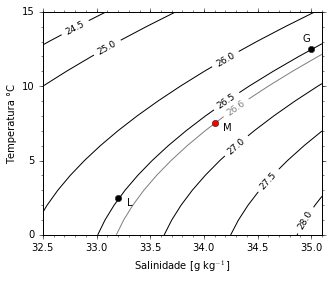

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator


rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'
fig, ax = plt.subplots(figsize=(5, 4))
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylabel(u"Temperatura \u00b0C")
ax.set_xlabel(r"Salinidade [g kg$^{-1}$]")
ax.axis([32.5, 35.1, 0, 15])

cs = ax.contour(s, t, sigma_theta, colors='black', levels=levels)
ax.clabel(cs, fontsize=9, inline=1, fmt='%2.1f')
sg = ax.contour(s, t, sigma_theta, linestyle='--', colors='grey', levels=[0, line])
ax.clabel(sg, fontsize=9, inline=1, fmt='%2.1f')
ax.plot(L[0], L[1], 'ko')
ax.plot(G[0], G[1], 'ko')
ax.plot(M[0], M[1], 'ro')
xoffset, yoffset = 0.08, 0.5
ax.text(L[0] + xoffset, L[1] - yoffset, 'L')
ax.text(G[0] - xoffset, G[1] + yoffset, 'G')
ax.text(M[0] + xoffset, M[1] - yoffset, 'M')

fig.savefig("Diagrama-TS.pdf", dpi=150)

[Mixing](http://oceanworld.tamu.edu/resources/ocng_textbook/chapter13/chapter13_03.htm) of two water types of the same density (L and G) produces water that is denser (M) than either water type. From Tolmazin (1985).